# 对数回归

对数回归可以写为：$$lny=w^Tx + b$$
写成指数形式为：$$y = e^{w^Tx + b}$$
与线性回归相似
$$L(w, b) = \frac{1}{2n}\sum_{i=1}^{i=m}( \hat{y} - y^i)^2$$

这样求出关于w，b的梯度为：
$$\frac{\partial L}{\theta_j} = \frac{1}{n}\sum_{i=1}^{i=m}(\hat{y} - y^i) x_j^i · e^{w^Tx+b}$$

In [1]:
import torch 
import torch.autograd
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x, w, b):
    return  torch.tensor(math.e) ** (x * w + b)

In [3]:
data_set = pd.read_csv("Salary_dataset.csv")

In [4]:
x = data_set["YearsExperience"]
y = data_set['Salary']
train_set = data_set.sample(frac=0.5, random_state=0, axis=0)
test_set = data_set[~data_set.index.isin(train_set.index)]
x_train = train_set["YearsExperience"].to_numpy()
y_train = train_set["Salary"].to_numpy()
x_test = test_set["YearsExperience"].to_numpy()
y_test = test_set["Salary"].to_numpy()

In [5]:
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
lr = 0.001
n = x_train.size

for i in range(0, 20000):
    j:int = 0
    loss = (math.e * (torch.tensor(x_train, requires_grad=True) * w + b) - torch.tensor(y_train, requires_grad=True)) ** 2 / 2
    loss.sum().backward()
    with torch.no_grad():
        w.data = w.data - lr  * (w.grad.data / n)
        b.data = b.data - lr  * (b.grad.data / n)
        print("第 %d 次迭代 w = %f  b = %f" % (i,w.data, b.data))
        w.grad.zero_()
        b.grad.zero_()

第 0 次迭代 w = 1530.832642  b = 222.342087
第 1 次迭代 w = 2557.221680  b = 374.073822
第 2 次迭代 w = 3245.698730  b = 479.079041
第 3 次迭代 w = 3707.369141  b = 552.717346
第 4 次迭代 w = 4016.807129  b = 605.298218
第 5 次迭代 w = 4224.066895  b = 643.741333
第 6 次迭代 w = 4362.745117  b = 672.691223
第 7 次迭代 w = 4455.391602  b = 695.265320
第 8 次迭代 w = 4517.142090  b = 713.556091
第 9 次迭代 w = 4558.155762  b = 728.967957
第 10 次迭代 w = 4585.251465  b = 742.443604
第 11 次迭代 w = 4603.005859  b = 754.615723
第 12 次迭代 w = 4614.490723  b = 765.909058
第 13 次迭代 w = 4621.768555  b = 776.608643
第 14 次迭代 w = 4626.222656  b = 786.905762
第 15 次迭代 w = 4628.781738  b = 796.928894
第 16 次迭代 w = 4630.069824  b = 806.764221
第 17 次迭代 w = 4630.505371  b = 816.469666
第 18 次迭代 w = 4630.369141  b = 826.084045
第 19 次迭代 w = 4629.849609  b = 835.633423
第 20 次迭代 w = 4629.073730  b = 845.135315
第 21 次迭代 w = 4628.125977  b = 854.601501
第 22 次迭代 w = 4627.062988  b = 864.039856
第 23 次迭代 w = 4625.923828  b = 873.455688
第 24 次迭代 w = 4624.733887  

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


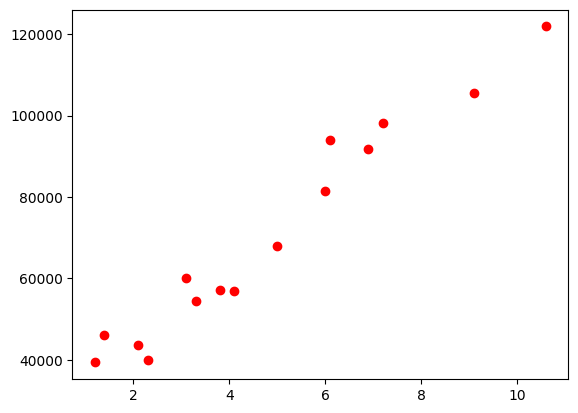

In [6]:
plt.figure()

plt.scatter(x_test, y_test, c='r')
y_hat = np.zeros(x_test.size)

j = 0
for c_x in x_test:
    y_hat[j] = f(c_x, w, b)
    print(y_hat[j])
    j = j + 1

plt.plot(x_test, y_hat, c = "b")
plt.show()